In [ ]:
'''
IC272 
Lab Assignment 2
Shubham Shukla
B20168
'''

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# """Question 1"""

# # importing important packages
# import pandas as pd
# import matplotlib.pyplot as plt

# # reading csv data 
# df = pd.read_csv('landslide_data3_miss.csv')

# # Creating the series data for missing values according to attributes
# missing_values = df.isnull().sum()

# # plotting the bar graph for the missing data according to attributes using series data obtained above
# plt.bar(missing_values.index, missing_values.values, color = 'g')
# plt.xticks(rotation = 30)
# plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# """Question 2"""

# # importing the important packages
# import pandas as pd
# import numpy as np

# # reading csv file
# df = pd.read_csv('landslide_data3_miss.csv')

# """Part (a)"""

# # storing initial no of rows
# initial_rows = df.shape[0]

# # dropping the nan values of stationid attribute
# df = df.dropna(subset=['stationid'])

# # Storing the final no of rows
# final_rows = df.shape[0]

# # by substracting the initial no of rows with initial no of rows we get total no of rows dropped
# # hence printing it
# print("Total number of rows dropped is : ", initial_rows - final_rows)

# """Part (b)"""

# # creating list variable to store the deleted row data 
# drop_list = list()

# # iterating through the dataframe to store the specified row
# for i in df.index:
#     if(df.loc[i].isnull().sum() >= len(df.columns)/3):
#         # appending the row to be deleted
#         drop_list.append(df.loc[i])
#         # deleting the row
#         df = df.drop([i], axis = 0)

# # printing the data we get

# print("\n\nThe data having equal to or more than one third of attributes with missing values : ")
# # making the dropped list data to a dataframe to for better representation
# dropped_data = pd.DataFrame(drop_list)
# print(dropped_data)

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# '''Question 3'''

# # Creating a series of the missing data values by attribute
# print("\n\nCount of the values which are missing corresponding to attributes : ")
# missing_series = df.isnull().sum()
# print(missing_series)

# # printing the sum of the total values of the obtained series
# print("\n\nSum of total missing values in the current data : ", sum(missing_series.values))

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# # '''Question 4'''

# """Part (a)"""
# # importing the important packages
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # reading the csv file
# df = pd.read_csv('landslide_data3_miss.csv')
# df2 = pd.read_csv('landslide_data3_original.csv')

# # dropping the row which don't have stationid data
# df = df.dropna(subset=['stationid'])

# # Creating a series of mean data from dataframe for to fill in other non present values wrt attributes
# mean_data = df.mean()

# # filling the mean data 
# for att in mean_data.index:
#     df[att] = df[att].fillna(mean_data[att])

# # creating a function which will return a dataframe of mean, median, mode and std from the passed dataframe
# def create_database(data):
#     mean_ = data.mean()
#     med_ = data.median()
#     mode_ = data.mode(); mode_ = mode_.iloc[0, 2:]
#     std_ = data.std()
#     statistical_data = pd.DataFrame({'Mean': mean_, 'Median': med_, 'Mode': mode_, 'Std': std_})
#     return statistical_data

# # Creating a function which will return the RMSE value for the passes attribute
# def RMSE_val(att):
#     Na = 0
#     sq_sum = 0;
#     for i in df.index:
#         if(df.loc[i, att] - df2.loc[i, att] != 0):
#             Na += 1;
#             sq_sum += pow(df.loc[i, att] - df2.loc[i, att], 2)
#     return pow(sq_sum/Na, 0.5)
    
# # Creating a list of attributes whose RMSE values is to found out
# RMSE_att = ['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']

# # printing the statistical dataframe for filled in dataframe with the original one
# print("Statistical data filling with mean values in missing data : \n")
# data1 = create_database(df);print(data1);
 
# print("\nStatistical data of the original dataframe : \n")
# data2 = create_database(df2);print(data2)

# # Creating a dictionary variable
# ind_dict = dict()

# # Inputting the value of RMSE in dictionary
# for att in RMSE_att:
#     ind_dict[att] = RMSE_val(att)

# # Plotting the graph for RMSE values
# plt.bar(ind_dict.keys(), ind_dict.values(), color = 'r')
# plt.xticks(rotation = 30)
# plt.show()

# """Part (b)"""

# # again reading the data
# df = pd.read_csv('landslide_data3_miss.csv')
# df2 = pd.read_csv('landslide_data3_original.csv')

# # dropping rows for non found values of stationid
# df = df.dropna(subset=['stationid'])

# # filling the dataframe with linear interpolation
# df = df.interpolate(method = 'linear')

# print("Statistical data after using linear interpolation : \n")
# data1 = create_database(df);print(data1);
 
# print("\nStatistical data of the original dataframe : \n")
# data2 = create_database(df2);print(data2)

# # Creating a list of attributes whose RMSE values is to found out
# RMSE_att = ['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']

# # Creating a dictionary variable
# ind_dict = dict()

# # Creating a function which will return the RMSE value for the passes attribute
# def RMSE_val(att):
#     Na = 0
#     sq_sum = 0;
#     for i in df.index:
#         if(df.loc[i, att] - df2.loc[i, att] != 0):
#             Na += 1;
#             sq_sum += pow(df.loc[i, att] - df2.loc[i, att], 2)
#     return pow(sq_sum/Na, 0.5)

# # Inputting the value of RMSE in dictionary
# for att in RMSE_att:
#     ind_dict[att] = RMSE_val(att)

# # Plotting the graph for RMSE values
# plt.bar(ind_dict.keys(), ind_dict.values(), color = 'r')
# plt.xticks(rotation = 30)
# plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# # '''Question 5'''

# # making a series for the 1st, 2nd, 3rd quartile ranges of temperature and rain attribute
# temp_qurt = df['temperature'].quantile(q = [0.25, 0.50,  0.75])
# rain_qurt = df['rain'].quantile(q = [0.25, 0.50, 0.75])

# # creating dictionary to store outliers of temperature and rain attribute
# temp_outliers = dict()
# rain_outliers = dict()

# # iterating through the attribute's series to store temperature and rain attribute's outliers
# for i in df['temperature'].index:
#     val = df['temperature'][i]
#     if(val < (temp_qurt[0.25] - 1.5*(temp_qurt[0.75] - temp_qurt[0.25])) or val > (temp_qurt[0.75] + 1.5*(temp_qurt[0.75] - temp_qurt[0.25]))):
#         temp_outliers[i] = val
# for i in df['rain'].index:
#     val = df['rain'][i]
#     if(val < (rain_qurt[0.25] - 1.5*(rain_qurt[0.75] - rain_qurt[0.25])) or val > (rain_qurt[0.75] + 1.5*(rain_qurt[0.75] - rain_qurt[0.25]))):
#         rain_outliers[i] = val

# # printing the collected dictionary data
# print("\nTemperature Outliers are : \n");print("Total outliers : ", len(temp_outliers.values()));print(temp_outliers)
# print("\nRain Outliers are : \n");print("Total outliers : ", len(rain_outliers.values())); print(rain_outliers)

# # plotting the data 
# plt.boxplot(df['temperature'])
# plt.title('Boxplot for temperature')
# plt.show()

# plt.boxplot(df['rain'])
# plt.title('Boxplot for rain')
# plt.show()

# # Changing outliers with the median of the data 
# for i in df['temperature'].index:
#     val = df.loc[i, 'temperature']
#     if(val < (temp_qurt[0.25] - 1.5*(temp_qurt[0.75] - temp_qurt[0.25])) or val > (temp_qurt[0.75] + 1.5*(temp_qurt[0.75] - temp_qurt[0.25]))):
#         df.loc[i, 'temperature'] = temp_qurt[0.50]
# for i in df['rain'].index:
#     val = df.loc[i, 'rain']
#     if(val < (rain_qurt[0.25] - 1.5*(rain_qurt[0.75] - rain_qurt[0.25])) or val > (rain_qurt[0.75] + 1.5*(rain_qurt[0.75] - rain_qurt[0.25]))):
#         df.loc[i, 'rain'] = rain_qurt[0.50]
        
# # analysing the data again first put quartile values in variables
# temp_qurt2 = df['temperature'].quantile(q = [0.25, 0.50,  0.75])
# rain_qurt2 = df['rain'].quantile(q = [0.25, 0.50, 0.75])

# # again creating dictionary to store outliers of temperature and rain attribute
# temp_outliers2 = dict()
# rain_outliers2 = dict()

# # iterating through the attribute's series to store temperature and rain attribute's outliers
# for i in df['temperature'].index:
#     val = df['temperature'][i]
#     if(val < (temp_qurt2[0.25] - 1.5*(temp_qurt2[0.75] - temp_qurt2[0.25])) or val > (temp_qurt2[0.75] + 1.5*(temp_qurt2[0.75] - temp_qurt2[0.25]))):
#         temp_outliers2[i] = val
# for i in df['rain'].index:
#     val = df['rain'][i]
#     if(val < (rain_qurt2[0.25] - 1.5*(rain_qurt2[0.75] - rain_qurt2[0.25])) or val > (rain_qurt2[0.75] + 1.5*(rain_qurt2[0.75] - rain_qurt2[0.25]))):
#         rain_outliers2[i] = val


# # Now let's print the collected dictionary data
# print("\nTemperature Outliers are after changing the ouliers with median are : \n");print("Total outliers : ", len(temp_outliers2.values()));print(temp_outliers2)
# print("\nRain Outliers are after changing the ouliers with median are : \n");print("Total outliers : ", len(rain_outliers2.values())); print(rain_outliers2)

# # Now again plotting the data
# plt.boxplot(df['temperature'])
# plt.title('Boxplot for temperature(after changing the outliers to median)')
# plt.show()

# plt.boxplot(df['rain'])
# plt.title('Boxplot for rain(after changing the outliers to median)')
# plt.show()

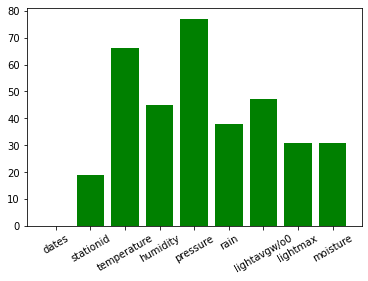

In [2]:
"""Question 1"""

# importing important packages
import pandas as pd
import matplotlib.pyplot as plt

# reading csv data 
df = pd.read_csv('landslide_data3_miss.csv')

# Creating the series data for missing values according to attributes
missing_values = df.isnull().sum()

# plotting the bar graph for the missing data according to attributes using series data obtained above
plt.bar(missing_values.index, missing_values.values, color = 'g')
plt.xticks(rotation = 30)
plt.show()

In [3]:
"""Question 2"""

# importing the important packages
import pandas as pd
import numpy as np

# reading csv file
df = pd.read_csv('landslide_data3_miss.csv')

"""Part (a)"""

# storing initial no of rows
initial_rows = df.shape[0]

# dropping the nan values of stationid attribute
df = df.dropna(subset=['stationid'])

# Storing the final no of rows
final_rows = df.shape[0]

# by substracting the initial no of rows with initial no of rows we get total no of rows dropped
# hence printing it
print("Total number of rows dropped is : ", initial_rows - final_rows)

"""Part (b)"""

# creating list variable to store the deleted row data 
drop_list = list()

# iterating through the dataframe to store the specified row
for i in df.index:
    if(df.loc[i].isnull().sum() >= len(df.columns)/3):
        # appending the row to be deleted
        drop_list.append(df.loc[i])
        # deleting the row
        df = df.drop([i], axis = 0)

# printing the data we get

print("\n\nThe data having equal to or more than one third of attributes with missing values : ")
# making the dropped list data to a dataframe to for better representation
dropped_data = pd.DataFrame(drop_list)
print(dropped_data)

'''Question 3'''

# Creating a series of the missing data values by attribute
print("\n\nCount of the values which are missing corresponding to attributes : ")
missing_series = df.isnull().sum()
print(missing_series)

# printing the sum of the total values of the obtained series
print("\n\nSum of total missing values in the current data : ", sum(missing_series.values))

Total number of rows dropped is :  19


The data having equal to or more than one third of attributes with missing values : 
          dates stationid  temperature  humidity     pressure      rain  \
34   16-08-2018       t10          NaN       NaN          NaN       NaN   
37   19-08-2018       t10     23.34058       NaN          NaN       NaN   
42   24-08-2018       t10     21.92199  99.00000          NaN       NaN   
49   31-08-2018       t10     22.52143  99.00000          NaN       NaN   
50   01-09-2018       t10          NaN       NaN          NaN       NaN   
61   12-09-2018       t10     22.29927  97.23358  1013.544526     87.75   
63   14-09-2018       t10     20.84211  98.14286  1015.972932       NaN   
66   17-09-2018       t10          NaN  90.54545          NaN      0.00   
81   02-10-2018       t10          NaN       NaN          NaN       NaN   
93   14-10-2018       t10     18.40714  82.82857          NaN       NaN   
95   16-10-2018       t10          NaN       NaN  

In [31]:
'''Question 3'''

# Creating a series of the missing data values by attribute
print("\n\nCount of the values which are missing corresponding to attributes : ")
missing_series = df.isnull().sum()
print(missing_series)

# printing the sum of the total values of the obtained series
print("\n\nSum of total missing values in the current data : ", sum(missing_series.values))



Count of the values which are missing corresponding to attributes : 
dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64


Sum of total missing values in the current data :  116


Statistical data filling with mean values in missing data : 

                      Mean       Median         Mode           Std
temperature      21.056281    21.786720    21.056281      4.259003
humidity         83.184940    90.173155         99.0     18.079405
pressure       1009.349023  1014.087140  1009.349023     45.126488
rain          11080.656786    22.500000          0.0  24788.305582
lightavgw/o0   4448.525200  1838.019050    4488.9103   7464.664825
lightmax      21587.283648  7186.000000       4000.0  21681.797060
moisture         32.499332    17.709150          0.0     33.285455

Statistical data of the original dataframe : 

                      Mean       Median        Mode           Std
temperature      21.214888    22.272730    12.72727      4.355818
humidity         83.479932    91.380950        99.0     18.210065
pressure       1009.008774  1014.677832  789.392692     46.980477
rain          10701.538370    18.000000         0.0  24852.255288
lightavgw/o0   4438.4284

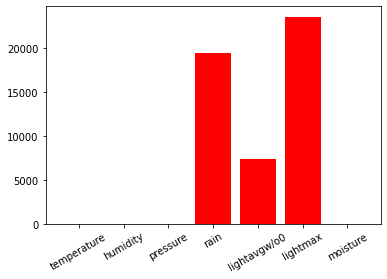

Statistical data after using linear interpolation : 

                      Mean       Median        Mode           Std
temperature      21.174437    22.158513    12.72727      4.345866
humidity         83.414989    91.367460        99.0     18.303153
pressure       1009.733066  1014.685202  789.392692     45.428094
rain          10836.054951    19.687500         0.0  24985.627551
lightavgw/o0   4521.710031  1579.859550   4488.9103   7634.951665
lightmax      21529.659287  6569.000000      4000.0  21913.421834
moisture         32.166688    16.220350         0.0     33.472732

Statistical data of the original dataframe : 

                      Mean       Median        Mode           Std
temperature      21.214888    22.272730    12.72727      4.355818
humidity         83.479932    91.380950        99.0     18.210065
pressure       1009.008774  1014.677832  789.392692     46.980477
rain          10701.538370    18.000000         0.0  24852.255288
lightavgw/o0   4438.428453  1656.880000 

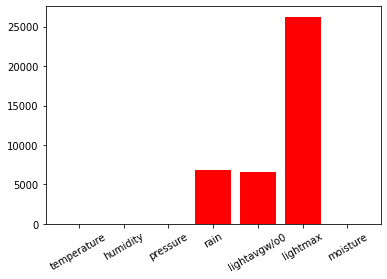


Temperature Outliers are : 

Total outliers :  10
{509: 7.6729, 510: 7.6729, 511: 7.6729, 512: 7.6729, 513: 7.6729, 514: 7.6729, 515: 7.6729, 516: 7.6729, 517: 7.6729, 518: 7.6729}

Rain Outliers are : 

Total outliers :  183
{135: 13583.25, 136: 6791.625, 199: 15459.75, 200: 14001.75, 201: 16571.25, 206: 13666.5, 322: 59982.75, 323: 80000.0, 324: 75048.75, 367: 80000.0, 368: 80000.0, 369: 80000.0, 370: 80000.0, 630: 3930.5, 631: 36636.75, 632: 40789.0, 636: 63256.5, 637: 54616.5, 638: 50172.75, 693: 37928.25, 694: 26178.75, 696: 3138.75, 697: 3449.25, 699: 18884.25, 702: 9765.0, 704: 18976.5, 705: 30393.0, 711: 2814.75, 742: 80000.0, 743: 82037.25, 744: 56319.75, 748: 71968.5, 749: 80000.0, 750: 80000.0, 751: 50242.5, 752: 80000.0, 753: 80000.0, 754: 80000.0, 755: 80000.0, 756: 80000.0, 757: 80000.0, 758: 80000.0, 759: 80000.0, 760: 80000.0, 761: 80000.0, 762: 80000.0, 763: 80000.0, 764: 80000.0, 765: 80000.0, 766: 80000.0, 767: 80000.0, 768: 80000.0, 769: 80000.0, 770: 80000.0, 771:

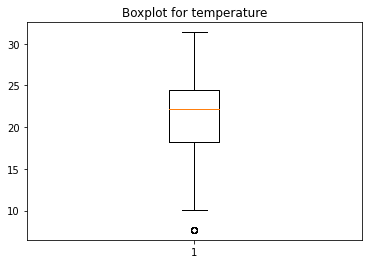

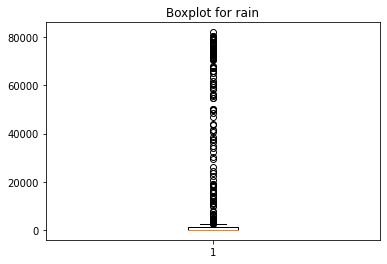


Temperature Outliers are after changing the ouliers with median are : 

Total outliers :  0
{}

Rain Outliers are after changing the ouliers with median are : 

Total outliers :  191
{1: 1761.75, 2: 652.5, 3: 963.0, 4: 254.25, 5: 339.75, 11: 607.5, 12: 560.25, 13: 513.0, 15: 474.75, 16: 817.875, 17: 1161.0, 20: 240.75, 21: 398.25, 23: 816.75, 24: 776.25, 25: 681.75, 26: 441.0, 27: 274.5, 30: 1341.0, 31: 1804.5, 36: 2171.25, 37: 1456.875, 38: 742.5, 39: 443.25, 40: 774.0, 41: 1167.75, 42: 898.875, 43: 630.0, 44: 594.0, 48: 546.75, 49: 576.0, 50: 605.25, 51: 634.5, 53: 1091.25, 56: 162.0, 62: 366.75, 63: 183.375, 70: 589.5, 71: 207.0, 72: 281.25, 73: 1215.0, 90: 315.0, 141: 1260.0, 142: 324.0, 144: 360.0, 145: 679.5, 198: 1710.0, 202: 1183.5, 203: 1962.0, 204: 1071.0, 205: 438.75, 207: 864.0, 208: 816.75, 209: 796.5, 213: 191.25, 218: 202.5, 219: 1611.0, 227: 353.25, 229: 533.25, 230: 213.75, 231: 434.25, 232: 191.25, 235: 202.5, 237: 594.0, 238: 409.5, 246: 333.0, 248: 468.0, 250: 222.

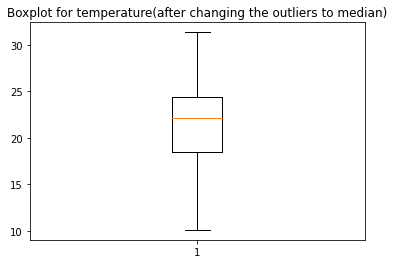

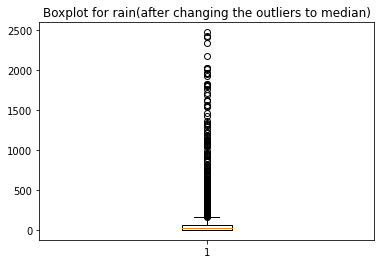

In [1]:
# '''Question 4'''

"""Part (a)"""
# importing the important packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading the csv file
df = pd.read_csv('landslide_data3_miss.csv')
df2 = pd.read_csv('landslide_data3_original.csv')

# dropping the row which don't have stationid data
df = df.dropna(subset=['stationid'])

# Creating a series of mean data from dataframe for to fill in other non present values wrt attributes
mean_data = df.mean()

# filling the mean data 
for att in mean_data.index:
    df[att] = df[att].fillna(mean_data[att])

# creating a function which will return a dataframe of mean, median, mode and std from the passed dataframe
def create_database(data):
    mean_ = data.mean()
    med_ = data.median()
    mode_ = data.mode(); mode_ = mode_.iloc[0, 2:]
    std_ = data.std()
    statistical_data = pd.DataFrame({'Mean': mean_, 'Median': med_, 'Mode': mode_, 'Std': std_})
    return statistical_data

# Creating a function which will return the RMSE value for the passes attribute
def RMSE_val(att):
    Na = 0
    sq_sum = 0;
    for i in df.index:
        if(df.loc[i, att] - df2.loc[i, att] != 0):
            Na += 1;
            sq_sum += pow(df.loc[i, att] - df2.loc[i, att], 2)
    return pow(sq_sum/Na, 0.5)
    
# Creating a list of attributes whose RMSE values is to found out
RMSE_att = ['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']

# printing the statistical dataframe for filled in dataframe with the original one
print("Statistical data filling with mean values in missing data : \n")
data1 = create_database(df);print(data1);
 
print("\nStatistical data of the original dataframe : \n")
data2 = create_database(df2);print(data2)

# Creating a dictionary variable
ind_dict = dict()

# Inputting the value of RMSE in dictionary
for att in RMSE_att:
    ind_dict[att] = RMSE_val(att)

# Plotting the graph for RMSE values
plt.bar(ind_dict.keys(), ind_dict.values(), color = 'r')
plt.xticks(rotation = 30)
plt.show()

"""Part (b)"""

# again reading the data
df = pd.read_csv('landslide_data3_miss.csv')
df2 = pd.read_csv('landslide_data3_original.csv')

# dropping rows for non found values of stationid
df = df.dropna(subset=['stationid'])

# filling the dataframe with linear interpolation
df = df.interpolate(method = 'linear')

print("Statistical data after using linear interpolation : \n")
data1 = create_database(df);print(data1);
 
print("\nStatistical data of the original dataframe : \n")
data2 = create_database(df2);print(data2)

# Creating a list of attributes whose RMSE values is to found out
RMSE_att = ['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']

# Creating a dictionary variable
ind_dict = dict()

# Creating a function which will return the RMSE value for the passes attribute
def RMSE_val(att):
    Na = 0
    sq_sum = 0;
    for i in df.index:
        if(df.loc[i, att] - df2.loc[i, att] != 0):
            Na += 1;
            sq_sum += pow(df.loc[i, att] - df2.loc[i, att], 2)
    return pow(sq_sum/Na, 0.5)

# Inputting the value of RMSE in dictionary
for att in RMSE_att:
    ind_dict[att] = RMSE_val(att)

# Plotting the graph for RMSE values
plt.bar(ind_dict.keys(), ind_dict.values(), color = 'r')
plt.xticks(rotation = 30)
plt.show()

'''Question 5'''

# making a series for the 1st, 2nd, 3rd quartile ranges of temperature and rain attribute
temp_qurt = df['temperature'].quantile(q = [0.25, 0.50,  0.75])
rain_qurt = df['rain'].quantile(q = [0.25, 0.50, 0.75])

# creating dictionary to store outliers of temperature and rain attribute
temp_outliers = dict()
rain_outliers = dict()

# iterating through the attribute's series to store temperature and rain attribute's outliers
for i in df['temperature'].index:
    val = df['temperature'][i]
    if(val < (temp_qurt[0.25] - 1.5*(temp_qurt[0.75] - temp_qurt[0.25])) or val > (temp_qurt[0.75] + 1.5*(temp_qurt[0.75] - temp_qurt[0.25]))):
        temp_outliers[i] = val
for i in df['rain'].index:
    val = df['rain'][i]
    if(val < (rain_qurt[0.25] - 1.5*(rain_qurt[0.75] - rain_qurt[0.25])) or val > (rain_qurt[0.75] + 1.5*(rain_qurt[0.75] - rain_qurt[0.25]))):
        rain_outliers[i] = val

# printing the collected dictionary data
print("\nTemperature Outliers are : \n");print("Total outliers : ", len(temp_outliers.values()));print(temp_outliers)
print("\nRain Outliers are : \n");print("Total outliers : ", len(rain_outliers.values())); print(rain_outliers)

# plotting the data 
plt.boxplot(df['temperature'])
plt.title('Boxplot for temperature')
plt.show()

plt.boxplot(df['rain'])
plt.title('Boxplot for rain')
plt.show()

# Changing outliers with the median of the data 
for i in df['temperature'].index:
    val = df.loc[i, 'temperature']
    if(val < (temp_qurt[0.25] - 1.5*(temp_qurt[0.75] - temp_qurt[0.25])) or val > (temp_qurt[0.75] + 1.5*(temp_qurt[0.75] - temp_qurt[0.25]))):
        df.loc[i, 'temperature'] = temp_qurt[0.50]
for i in df['rain'].index:
    val = df.loc[i, 'rain']
    if(val < (rain_qurt[0.25] - 1.5*(rain_qurt[0.75] - rain_qurt[0.25])) or val > (rain_qurt[0.75] + 1.5*(rain_qurt[0.75] - rain_qurt[0.25]))):
        df.loc[i, 'rain'] = rain_qurt[0.50]
        
# analysing the data again first put quartile values in variables
temp_qurt2 = df['temperature'].quantile(q = [0.25, 0.50,  0.75])
rain_qurt2 = df['rain'].quantile(q = [0.25, 0.50, 0.75])

# again creating dictionary to store outliers of temperature and rain attribute
temp_outliers2 = dict()
rain_outliers2 = dict()

# iterating through the attribute's series to store temperature and rain attribute's outliers
for i in df['temperature'].index:
    val = df['temperature'][i]
    if(val < (temp_qurt2[0.25] - 1.5*(temp_qurt2[0.75] - temp_qurt2[0.25])) or val > (temp_qurt2[0.75] + 1.5*(temp_qurt2[0.75] - temp_qurt2[0.25]))):
        temp_outliers2[i] = val
for i in df['rain'].index:
    val = df['rain'][i]
    if(val < (rain_qurt2[0.25] - 1.5*(rain_qurt2[0.75] - rain_qurt2[0.25])) or val > (rain_qurt2[0.75] + 1.5*(rain_qurt2[0.75] - rain_qurt2[0.25]))):
        rain_outliers2[i] = val


# Now let's print the collected dictionary data
print("\nTemperature Outliers are after changing the ouliers with median are : \n");print("Total outliers : ", len(temp_outliers2.values()));print(temp_outliers2)
print("\nRain Outliers are after changing the ouliers with median are : \n");print("Total outliers : ", len(rain_outliers2.values())); print(rain_outliers2)

# Now again plotting the data
plt.boxplot(df['temperature'])
plt.title('Boxplot for temperature(after changing the outliers to median)')
plt.show()

plt.boxplot(df['rain'])
plt.title('Boxplot for rain(after changing the outliers to median)')
plt.show()

In [ ]:
main attribute 
>50